06:30:35 - cmdstanpy - INFO - Chain [1] start processing
06:30:35 - cmdstanpy - INFO - Chain [1] done processing


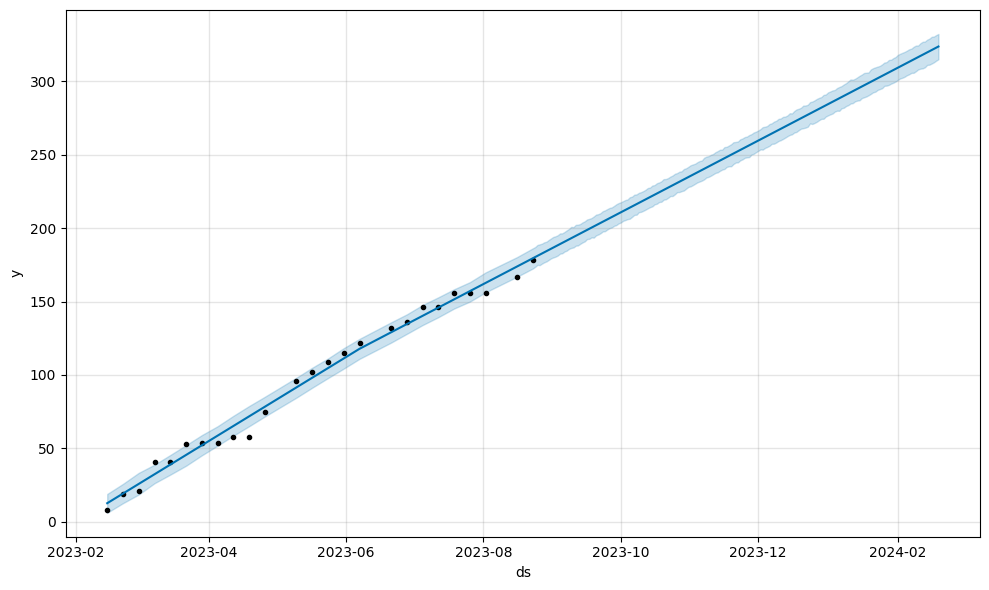

In [11]:
from prophet import Prophet
import pandas as pd
import plotly as py
from prophet.plot import plot_plotly
import plotly.offline as pyo
import os
notebook_path = os.path.abspath("Notebook.ipynb")



# df = pd.read_csv('./s.csv')
# df = pd.read_csv(os.path.join(os.path.dirname(notebook_path), "./s.csv"))
df = pd.read_csv('/app/s.csv')
# Prophet では予測する列を y、日付データを ds とすることに注意して、Close を予測するモデルを作成してみます。
data = df.reset_index().rename(columns={'Sprint終了日': 'ds', '累計ポイント': 'y'}) 


m = Prophet()
m.fit(data)

future = m.make_future_dataframe(periods=180)
# future.tail()
forecast = m.predict(future)
fig1 = m.plot(forecast)

fig1 = plot_plotly(m, forecast)
pyo.iplot(fig1)